# Data Intelligence Exam

Jonas Skjødt | skjo@itu.dk | Date: 2025-06-12  

## Introduction

Here the student gives an introduction to the dataset and some social and cultural context.

They give an overview of the report the have written and the different steps they will go through.

In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

We start by importing pandas, a library to easier shape the data in the csv file. We also import matplotlib and seaborn to visualize the plots.

In [3]:
df = pd.read_csv("../../dataExam/banking.csv")
print(df)

print(df.columns.tolist())

       age           job marital-status  education default  balance housing  \
0       58    management        married   tertiary      no     2143     yes   
1       44    technician         single  secondary      no       29     yes   
2       33  entrepreneur        married  secondary      no        2     yes   
3       47   blue-collar        married        NaN      no     1506     yes   
4       33       unknown         single    unknown      no        1      no   
...    ...           ...            ...        ...     ...      ...     ...   
45206   51    technician        married   tertiary      no      825      no   
45207   71       retired       divorced    primary      no     1729      no   
45208   72       retired        married  secondary      no     5715      no   
45209   57   blue-collar        married  secondary      no      668      no   
45210   37  entrepreneur        married  secondary      no     2971      no   

      loan    contact  day month  duration  campaig

Printing the dataset gives an idea what the dataset contains and their column names. Continue the exploration.

# Exploration
In the exploration phase we'll try to understand the data set better. Let's start with the "lesser knowns" of the data set.

In [ ]:
count = df['contact'].value_counts()
print(count, "\n")

count2 = df['previous'].value_counts()
print(count2, "\n")

count3 = df['previous-campaign-result'].value_counts()
print(count3, "\n")

count4 = df['marketing-result'].value_counts()
print(count4)



contact
cellular     29285
unknown      13020
telephone     2906
Name: count, dtype: int64 



KeyError: 'previous'

These four columns looks different than the other columns at a glance. At this point "previous" seems odd, as it's hard to determine what it corrolates with or what it refers to. 

In [ ]:
print(df.groupby(['previous', 'marketing-result']).size().unstack(fill_value=0.0))

marketing-result  failure  success
previous                          
0.0               32570.0   3288.0
1.0                2120.0    560.0
2.0                1599.0    446.0
3.0                 824.0    290.0
4.0                 530.0    167.0
5.0                 330.0    118.0
6.0                 187.0     79.0
7.0                 144.0     53.0
8.0                  87.0     39.0
9.0                  67.0     24.0
10.0                 39.0     26.0
11.0                 50.0     14.0
12.0                 32.0     10.0
13.0                 29.0      9.0
14.0                 14.0      4.0
15.0                 18.0      1.0
16.0                 13.0      0.0
17.0                 11.0      3.0
18.0                  6.0      0.0
19.0                  9.0      2.0
20.0                  7.0      1.0
21.0                  3.0      1.0
22.0                  4.0      1.0
23.0                  6.0      1.0
24.0                  5.0      0.0
25.0                  4.0      0.0
26.0                

It seems like the column 'previous' could be corrolating with the column 'marketing_results'. There seems to be a bigger success rate if the "previous" is between 3-10. This could perhaps indicate 'previous' is the amount of times a client was contacted before they successfully accepted the banks (marketing) offer.

Let's rename the column to a more nuanced name to what the column reflects, lets call it previous-campaign. We also filled the missing NaN values with 0.0, the NaN data doesnt seem relevant so we'll just fill it up with zero values.

In [26]:
df = df.rename(columns={'previous': 'previous-campaign'})
print(df.columns.tolist())

['age', 'job', 'marital-status', 'education', 'default', 'balance', 'housing', 'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'days-since-last-contact', 'previous-campaign', 'previous-campaign-result', 'marketing-result']


Procent of previous-campaign: count    43872.000000
mean         0.503373
std          1.343048
min          0.000000
50%          0.000000
90%          2.000000
95%          3.000000
99%          7.000000
max          7.000000
Name: previous-campaign, dtype: float64


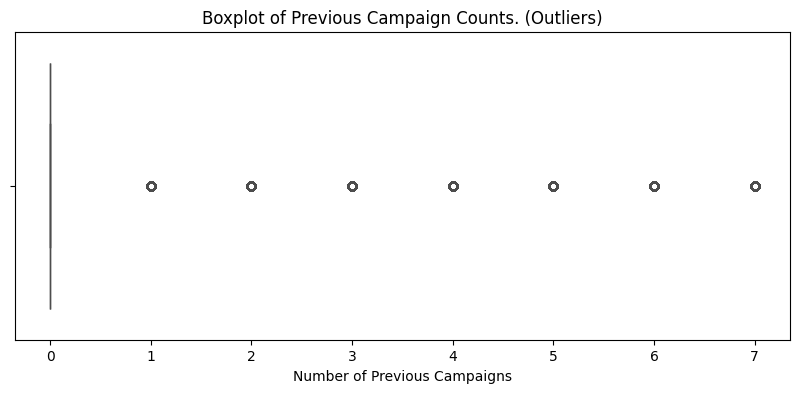

In [ ]:
print('Procent of previous-campaign:', df['previous-campaign'].describe(percentiles=[0.5, 0.9, 0.95, 0.99]))

df['previous-campaign'] = df['previous-campaign'].clip(upper=7)

plt.figure(figsize=(10, 4))
sns.boxplot(x=df['previous-campaign'], color='blue')
plt.title('Boxplot of Previous Campaign Counts. (Outliers)')
plt.xlabel('Number of Previous Campaigns')
plt.show()

We import seaborn to visualize the outlier plot. It shows 'previous-campaign' has some outliers. We clean it up by capping the value at 7 since 99% (as seen in the print statement) of the values are equal to or lower than 7.

marketing-result           failure   success
previous-campaign-result                    
failure                   0.873903  0.126097
other                     0.833152  0.166848
success                   0.352747  0.647253
unknown                   0.908385  0.091615 
 

marketing-result                             failure   success
previous-campaign previous-campaign-result                    
0.0               unknown                   0.908305  0.091695
1.0               failure                   0.889429  0.110571
                  other                     0.846690  0.153310
                  success                   0.370370  0.629630
2.0               failure                   0.877458  0.122542
                  other                     0.828042  0.171958
                  success                   0.364431  0.635569
                  unknown                   0.500000  0.500000
3.0               failure                   0.848910  0.151090
                  other          

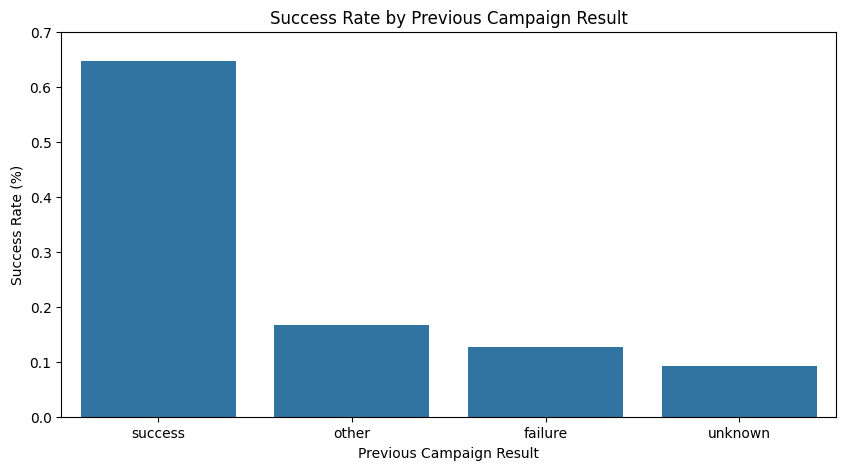

In [86]:
results = df.groupby('previous-campaign-result')['marketing-result'].value_counts(normalize=True).unstack()
print(results, "\n \n")

columns = ['previous-campaign', 'previous-campaign-result']
results2 = df.groupby(columns)['marketing-result'].value_counts(normalize=True).unstack()
results3 = results2.dropna()
print(results3, "\n \n")

# seaborn
# calculate the success
success_rates = df.groupby('previous-campaign-result')['marketing-result'] \
                  .value_counts(normalize=True) \
                  .unstack()['success'] \
                  .sort_values(ascending=False)
# show plit
plt.figure(figsize=(10, 5))
sns.barplot(x=success_rates.index, y=success_rates.values, legend=False, hue=1)
plt.title('Success Rate by Previous Campaign Result')
plt.xlabel('Previous Campaign Result')
plt.ylabel('Success Rate (%)')
plt.ylim(0, 0.7)
plt.show()

When we group previous-campaign-result and marketing-result, we see how past (marketing) successes are more likely to convert again. Likewise, those who were marketing campaigned towards who failed have a low success rate. This shows how the specific clients who are already susceptible to the campaigns respond well to the marketing again.

The success of the clients responding well (if prior marketing campaigns were successfull on them) is more noticable when we group 'previous-campaign', 'previous-campaign-result' and 'marketing-result'.

Overall the data indicates that even just 1 prior campaign improves the outcome of a success.

(Note: how old are these people who like the marketing, are they retired? what kind of jobs do they have? whats going on with these people who like marketing better if they were campaigned towards successfully already.)

C:\Users\jonas\AppData\Local\Temp\ipykernel_28116\1664983749.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=job_success.index, y=job_success.values, palette='viridis')


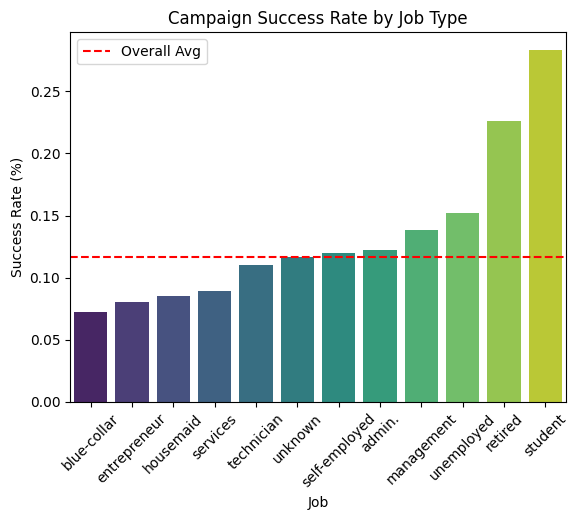

In [ ]:
job_success = df.groupby('job')['marketing-result'].apply(lambda x: (x == 'success').mean()).sort_values()

# Plot
sns.barplot(x=job_success.index, y=job_success.values, palette='viridis')
plt.title('Campaign Success Rate by Job Type')
plt.xlabel('Job')
plt.ylabel('Success Rate (%)')
plt.xticks(rotation=45)
plt.axhline(y=df['marketing-result'].eq('success').mean(), color='red', linestyle='--', label='Overall Avg') #eq = equal. The axhline looks at the average of the marketing result
plt.legend()
plt.show()

Investigating further who the marketing campaigns works best on, we'll look at the jobs of the clients. There is a clear abundancy of students, retired, and unemployed. Lets continue investigating other columns.

In [89]:
df['default'].value_counts()

default
no     44396
yes      815
Name: count, dtype: int64

Let's investigate the column 'default' more to see what it is and what it does. It most likely isn't about marketing, let's try others.

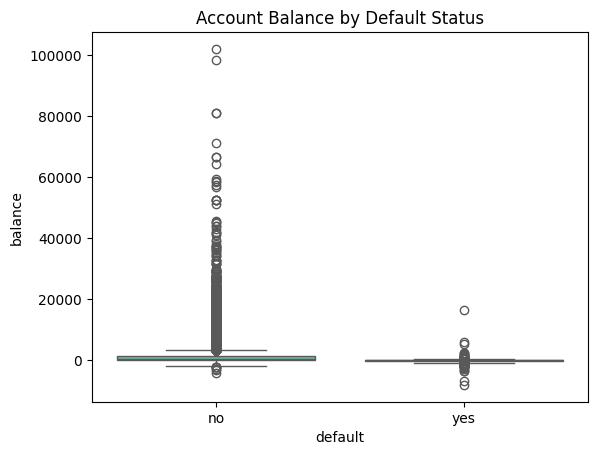

loan           no       yes
default                    
no       0.843612  0.156388
yes      0.630675  0.369325 
 



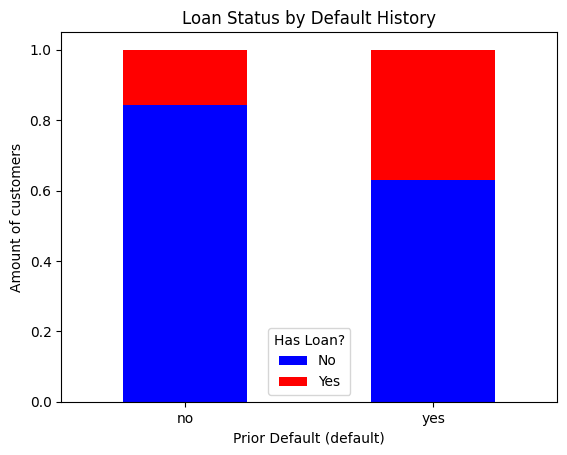

In [87]:
# with balance
sns.boxplot(x='default', y='balance', data=df, palette='Set2', legend=False, hue=1)
plt.title('Account Balance by Default Status')
plt.show()

# with loan
print(pd.crosstab(df['default'], df['loan'], normalize='index'), "\n \n")

# bar plot
pd.crosstab(df['default'], df['loan'], normalize='index').plot(kind='bar', stacked=True, color=['blue', 'red'])
plt.title('Loan Status by Default History')
plt.xlabel('Prior Default (default)')
plt.ylabel('Amount of customers')
plt.legend(title='Has Loan?', labels=['No', 'Yes'])
plt.xticks(rotation=0)
plt.show()

The boxplot shows does the clients who have a default usually have lower balances, compared to those who don't.

Crosstabbing 'default' and 'loan' also shows the group of clients with a default, also has a higher tendency to have loans. This is further indicated by the bar plot detailing the loan status by default history.

This indicates to the bank that they should be more thoughtful not to give those with a default a loan. - Since the clients with a default usually has small balances, and are usually more prone to take a loan, it shows they could be higher risk borrowers who could be relyinh on credit.

# Research questions and hypothesis
on the basis of the data exploration, ask questions to ask and some hypothesis to test. Analysation the underlying tendencies are done here in the next steps.

1: Which groups of clients does the bank have a higher risk to loan money to?

<em>or lose profit to, look into default, loan, jobs, age, education, marital-status, etc..

this is besides people who are obviously at risk for the bank, the people with low income, low balance, has loans, etc</em>

2: Which groups of clients are best to market towards, to gain more revenue for the bank?

<em>Which groups of clients contribute to the biggest revenue streams for the bank</em>

<em>What marketing campaigns brings the biggest revenue (clients) for the bank</em>



### Preprocessing
clean the data to make sure the values are all valid (before now its been only descriptive, now its time to handle the data to examine the data further)

### Examination of data
the relationships between different variables in the data to answer the questions

# Analysis
Investigating the data correlations (could be heatmap or any other plot showing the trends or tendencies)

### examination of the hypothesis'
analyse the one or more hypothesis (finding the tendencies after isolating the data)

# Conclusion
what have i learned

# references
sources from the course or the links we've used, citations etc.